<a href="https://colab.research.google.com/github/PaSathees/random-notebooks/blob/main/PyTorch_Paper_replication_testing_with_modularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are going to replicate original [ViT paper: An image is Worth 16x16 Words: Transformers for Image Recognition at Scale](https://arxiv.org/abs/2010.11929)

[PyTorch course notebook](https://github.com/PaSathees/ai-courses/blob/main/3.%20PYTORCH%20-%20UDEMY/8.%20PyTorch%20Paper%20Replicating/08_pytorch_paper_replicating.ipynb)

[Modular code repo](https://github.com/PaSathees/pytorch-bp)

# 1. Imports and environment setup

In [1]:
# Getting modue
!rm -rf pytorch_mod
!git clone https://github.com/PaSathees/pytorch_mod.git

Cloning into 'pytorch_mod'...
remote: Enumerating objects: 170, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 170 (delta 33), reused 35 (delta 32), pack-reused 133
Receiving objects: 100% (170/170), 37.42 KiB | 684.00 KiB/s, done.
Resolving deltas: 100% (105/105), done.


In [2]:
pip install -r pytorch_mod/requirements.txt --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.8/764.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 6.6 MB/s eta 

In [3]:
from pytorch_mod import env_setup, data_setup, engine, evaluation, utils, visualization, experimentation, deployment, cv_model_builders

In [4]:
env_setup.print_gpu_status()

1 Supported CUDA GPU available


In [5]:
env_setup.print_versions()

PyTorch Version: 2.0.1+cu118
Matplotlib Version: 3.7.1
Pandas Version: 1.5.3
Numpy Version: 1.23.5
Torchvision Version: 0.15.2+cu118
Torchaudio Version: 2.0.2+cu118
Scikit-learn Version: 1.2.2
Torchmetrics Version: 1.1.2
TQDM Version: 4.66.1
MLEXTEND Version: 0.22.0
PIL Version: 9.4.0
Torchinfo Version: 1.8.0
Gradio Version: 3.44.4


In [6]:
import torch
import torchvision
from torch import nn
from torchvision import transforms
from torchinfo import summary

In [7]:
device = env_setup.get_agnostic_device()
device

'cuda'

# 2. Getting data
Data is from the course given in a zip file (10%, 20%).

No need to bother with the problem as this is only testing modularized code.

In [8]:
image_path = utils.download_data(
    source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
    destination="pizza_steak_sushi",
    remove_source = True
)

image_path

[INFO] Did not find data/pizza_steak_sushi directory, creating one...
[INFO] Downloading pizza_steak_sushi.zip from https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip...
[INFO] Unzipping pizza_steak_sushi.zip data...


PosixPath('data/pizza_steak_sushi')

In [9]:
train_dir = image_path / "train"
test_dir = image_path / "test"

# 3. Custom model from scratch
We will use manual transforms for scratch model building. Later we can take a look at auto transforms with transfer learning.

## 3.A Creating Dataloaders

Image Resolution for dataloaders: 224 X 224 pixels (Table 3)

In [10]:
from torchvision import transforms

IMG_SIZE = 224

manual_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])

In [11]:
BATCH_SIZE = 32

train_dataloader, test_dataloader, class_names = data_setup.create_cv_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    train_transform=manual_transform,
    test_transform=manual_transform,
    batch_size=BATCH_SIZE
    )

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x7d1543e26410>,
 ['pizza', 'steak', 'sushi'])

## 3.B Replicating ViT model

We will be referring paper parts:
1. Figure 1: Overall architecture<br>
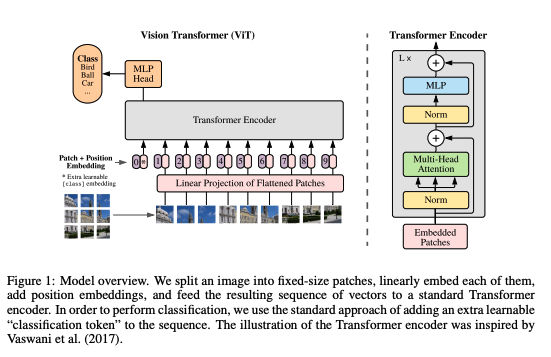
2. Four equations in section 3.1<br>
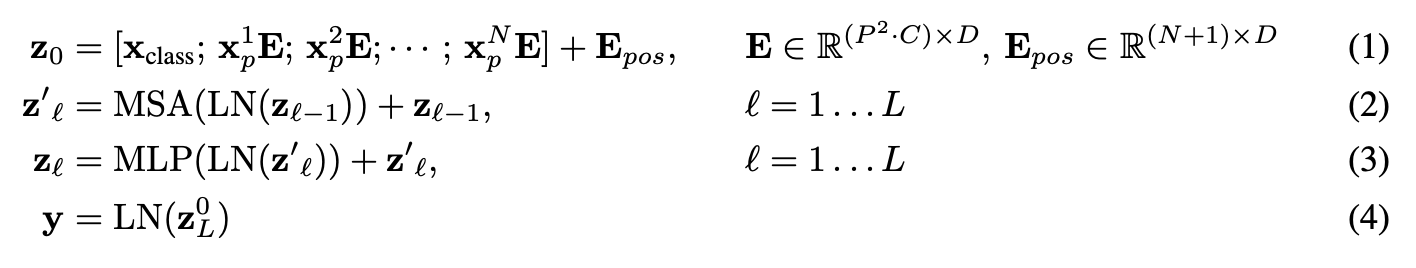
3. Table 1: Hyperparameters, we will be implementing ViT-Base<br>
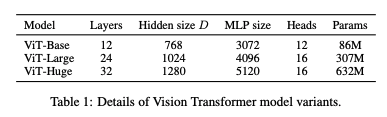

In [12]:
# Let's get a testing image
image_batch, label_batch = next(iter(train_dataloader))
image, label = image_batch[0], label_batch[0]
image.shape, label

(torch.Size([3, 224, 224]), tensor(1))

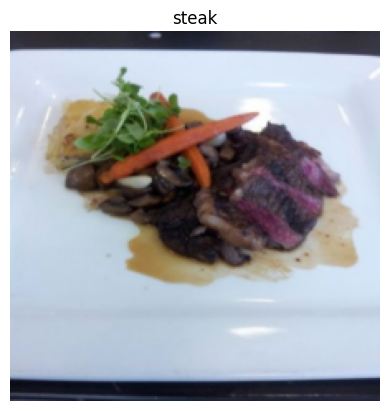

In [13]:
import matplotlib.pyplot as plt
# Plot testing image
plt.imshow(image.permute(1, 2, 0))
plt.title(class_names[label])
plt.axis(False);

### ViT Path embedding layer

In [14]:
class PatchEmbedding(nn.Module):
  """
  Turns a 2D input image into a 1D sequence of learnable embedding vector

  Args:
    in_channels (int): Number of color channels for the input images. Default 3.
    patch_size (int): Size of patches to convert input image into. Default 16.
    embedding_dim (int): Size of embedding to turn image into. Default 768.
  """
  def __init__(self, in_channels:int = 3, patch_size:int = 16, embedding_dim:int = 768):
    super().__init__()
    self.patcher = nn.Conv2d(
        in_channels=in_channels,
        out_channels=embedding_dim,
        kernel_size=patch_size,
        stride=patch_size,
        padding=0
    )
    self.flatten = nn.Flatten(
        start_dim=2,
        end_dim=3
    )
    self.patch_size = patch_size

  def forward(self, x):
    # check if the image is of correct shape
    image_resolution = x.shape[-1]
    assert image_resolution % self.patch_size == 0, f"Input image size must be divisble by patch size, image shape: {image_resolution}, patch size: {patch_size}"

    x_patched = self.patcher(x)
    x_flattened = self.flatten(x_patched)
    return x_flattened.permute(0, 2, 1)

In [15]:
# Create random input sizes for testing
random_input_image = (1, 3, 224, 224)

summary(PatchEmbedding(),
        input_size=random_input_image,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
PatchEmbedding (PatchEmbedding)          [1, 3, 224, 224]     [1, 196, 768]        --                   True
├─Conv2d (patcher)                       [1, 3, 224, 224]     [1, 768, 14, 14]     590,592              True
├─Flatten (flatten)                      [1, 768, 14, 14]     [1, 768, 196]        --                   --
Total params: 590,592
Trainable params: 590,592
Non-trainable params: 0
Total mult-adds (M): 115.76
Input size (MB): 0.60
Forward/backward pass size (MB): 1.20
Params size (MB): 2.36
Estimated Total Size (MB): 4.17

In [16]:
utils.set_seeds()
patchify = PatchEmbedding(
    in_channels=3,
    patch_size=16,
    embedding_dim=768
)
patch_embedded_image = patchify(image.unsqueeze(0))
image.unsqueeze(0).shape, patch_embedded_image.shape

(torch.Size([1, 3, 224, 224]), torch.Size([1, 196, 768]))

### Class token embedding

In [17]:
batch_size = patch_embedded_image.shape[0]
embedding_dimension = patch_embedded_image.shape[-1]

class_token = nn.Parameter(
    torch.ones(batch_size, 1, embedding_dimension),
    requires_grad=True
)

print(f"Class token shape: {class_token.shape} -> [batch_size, number_of_tokens, embedding_dimension]")

Class token shape: torch.Size([1, 1, 768]) -> [batch_size, number_of_tokens, embedding_dimension]


In [18]:
# Adding class token embedding to the front of the patch embedding
patch_embedded_image_with_class_embedding = torch.cat((class_token, patch_embedded_image), dim=1)
print(f"patch embedded image with class embedding shape: {patch_embedded_image_with_class_embedding.shape} -> [batch_size, number_of_patches, embedding_dimension]")

patch embedded image with class embedding shape: torch.Size([1, 197, 768]) -> [batch_size, number_of_patches, embedding_dimension]


### Position embedding

In [19]:
number_of_patches = int((224 * 224) / 16**2)

embedding_dimension = patch_embedded_image_with_class_embedding.shape[2]

position_embedding = nn.Parameter(
    torch.ones(1,
               number_of_patches+1,
               embedding_dimension),
    requires_grad=True)

print(f"Position embeddding shape: {position_embedding.shape} -> [batch_size, number_of_patches, embedding_dimension]")

Position embeddding shape: torch.Size([1, 197, 768]) -> [batch_size, number_of_patches, embedding_dimension]


In [20]:
patch_and_position_embedding = patch_embedded_image_with_class_embedding + position_embedding
print(f"patch and position embedding shape: {patch_and_position_embedding.shape} -> [batch_size, number_of_patches, embedding_dimension]")

patch and position embedding shape: torch.Size([1, 197, 768]) -> [batch_size, number_of_patches, embedding_dimension]


### Full embedding: from image to embedding

In [21]:
utils.set_seeds()

# 1. Set patch size
patch_size = 16

# 2. Print shape of original image tensor and dimensions
print(f"Image tensor shape: {image.shape}")
height, width = image.shape[1], image.shape[2]

# 3. Get image tensor and add batch dimension
x = image.unsqueeze(0)
print(f"Input image with batch dimension shape: {x.shape}")

# 4. Create patch embedding layer
patch_embedding_layer = PatchEmbedding(in_channels=3,
                                       patch_size=patch_size,
                                       embedding_dim=768)

# 5. Pass image through patch embedding layer
patch_embedding = patch_embedding_layer(x)
print(f"Patching embedding shape: {patch_embedding.shape}")

# 6. Create class token embedding
batch_size = patch_embedding.shape[0]
embedding_dimension = patch_embedding.shape[-1]
class_token = nn.Parameter(torch.ones(batch_size, 1, embedding_dimension),
                           requires_grad=True)
print(f"Class token embedding shape: {class_token.shape}")

# 7. Prepend class token embedding to patch embedding
patch_embedding_class_token = torch.cat((class_token, patch_embedding), dim=1)
print(f"Patch embedding with class token shape: {patch_embedding_class_token.shape}")

# 8. Create position embedding
number_of_patches = int((height * width) / patch_size**2)
position_embedding = nn.Parameter(
    torch.ones(1,
               number_of_patches+1,
               embedding_dimension),
    requires_grad=True)

# 9. Add position embedding to patch embedding with class token
patch_and_position_embedding = patch_embedding_class_token + position_embedding
print(f"Patch and position embedding shape: {patch_and_position_embedding.shape}")

Image tensor shape: torch.Size([3, 224, 224])
Input image with batch dimension shape: torch.Size([1, 3, 224, 224])
Patching embedding shape: torch.Size([1, 196, 768])
Class token embedding shape: torch.Size([1, 1, 768])
Patch embedding with class token shape: torch.Size([1, 197, 768])
Patch and position embedding shape: torch.Size([1, 197, 768])


### Multi-Head Self Attention (MSA): Equation 2

In [22]:
class MultiheadSelfAttentionBlock(nn.Module):
    """
    Creates a multi-head self-attention block ("MSA block").

    Args:
      embedding_dim (int): Hidden size D from Table 1 for ViT-Base, default 768.
      num_heads (int): Heads from Table 1 for ViT-Base, default 12.
      attn_dropout (int): Doesn't look like the paper uses any dropout in MSABlocks, default 0.
    """
    def __init__(self,
                 embedding_dim:int=768,
                 num_heads:int=12,
                 attn_dropout:float=0):
        super().__init__()
        # 1. Norm layer (LN)
        self.layer_norm = nn.LayerNorm(normalized_shape=embedding_dim)

        # 2. Multi-Head Attention (MSA) layer
        self.multihead_attn = nn.MultiheadAttention(
            embed_dim=embedding_dim,
            num_heads=num_heads,
            dropout=attn_dropout,
            batch_first=True
            )

    def forward(self, x):
        x = self.layer_norm(x)
        attn_output, _ = self.multihead_attn(
            query=x, # query embeddings
            key=x, # key embeddings
            value=x, # value embeddings
            need_weights=False) # Need the weights or just the layer outputs?
        return attn_output

In [23]:
multihead_self_attention_block = MultiheadSelfAttentionBlock(embedding_dim=768, num_heads=12) # from Table 1
patched_image_through_msa_block = multihead_self_attention_block(patch_and_position_embedding)

patch_and_position_embedding.shape, patched_image_through_msa_block.shape

(torch.Size([1, 197, 768]), torch.Size([1, 197, 768]))

### Multilayer Perceptron (MLP): Equation 3

In [24]:
class MLPBlock(nn.Module):
    """
    Creates a layer normalized multilayer perceptron block ("MLP block").

    Args:
      embedding_dim (int): Hidden size D from Table 1 for ViT-Base, default 768.
      mlp_size (int): MLP size from Table 1 for ViT-Base, default 3072.
      attn_dropout (int): Dropout from Table 3 for ViT-Base, default 0.1.
    """
    def __init__(self,
                 embedding_dim:int = 768,
                 mlp_size:int = 3072,
                 dropout:float = 0.1):
        super().__init__()

        # 1. Norm layer (LN)
        self.layer_norm = nn.LayerNorm(normalized_shape=embedding_dim)

        # 2. Multilayer perceptron (MLP) layer(s)
        self.mlp = nn.Sequential(
            nn.Linear(
                in_features=embedding_dim,
                out_features=mlp_size),
            nn.GELU(), # section 3.1"
            nn.Dropout(p=dropout),
            nn.Linear(
                in_features=mlp_size,
                out_features=embedding_dim),
            nn.Dropout(p=dropout)
        )

    def forward(self, x):
        x = self.layer_norm(x)
        x = self.mlp(x)
        return x

In [25]:
mlp_block = MLPBlock(embedding_dim=768, # Table 1
                     mlp_size=3072, # Table 1
                     dropout=0.1) # Table 3

patched_image_through_mlp_block = mlp_block(patched_image_through_msa_block)
patched_image_through_msa_block.shape, patched_image_through_mlp_block.shape

(torch.Size([1, 197, 768]), torch.Size([1, 197, 768]))

### Transformer Encoder from custom layer

In [26]:
class TransformerEncoderBlock(nn.Module):
    """
    Creates a Transformer Encoder block.

    Args:
      embedding_dim (int): Hidden size D from Table 1 for ViT-Base, default 768.
      num_heads (int): Heads from Table 1 for ViT-Base, default 12.
      mlp_size (int): MLP size from Table 1 for ViT-Base, default 3072.
      mlp_dropout (int): Amount of dropout for dense layers from Table 3 for ViT-Base, default 0.1.
      attn_dropout (int): Amount of dropout for attention layers, default 0.
    """
    def __init__(self,
                 embedding_dim:int = 768,
                 num_heads:int = 12,
                 mlp_size:int = 3072,
                 mlp_dropout:float = 0.1,
                 attn_dropout:float = 0):
        super().__init__()

        # 1. MSA block (equation 2)
        self.msa_block = MultiheadSelfAttentionBlock(embedding_dim=embedding_dim,
                                                     num_heads=num_heads,
                                                     attn_dropout=attn_dropout)

        # 2. MLP block (equation 3)
        self.mlp_block =  MLPBlock(embedding_dim=embedding_dim,
                                   mlp_size=mlp_size,
                                   dropout=mlp_dropout)

    def forward(self, x):

        # 3. Residual connection for MSA block
        x =  self.msa_block(x) + x

        # 4. Residual connection for MLP block
        x = self.mlp_block(x) + x

        return x

In [27]:
transformer_encoder_block = TransformerEncoderBlock()

summary(model=transformer_encoder_block,
        input_size=(1, 197, 768), # (batch_size, num_patches, embedding_dimension)
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
TransformerEncoderBlock (TransformerEncoderBlock)  [1, 197, 768]        [1, 197, 768]        --                   True
├─MultiheadSelfAttentionBlock (msa_block)          [1, 197, 768]        [1, 197, 768]        --                   True
│    └─LayerNorm (layer_norm)                      [1, 197, 768]        [1, 197, 768]        1,536                True
│    └─MultiheadAttention (multihead_attn)         --                   [1, 197, 768]        2,362,368            True
├─MLPBlock (mlp_block)                             [1, 197, 768]        [1, 197, 768]        --                   True
│    └─LayerNorm (layer_norm)                      [1, 197, 768]        [1, 197, 768]        1,536                True
│    └─Sequential (mlp)                            [1, 197, 768]        [1, 197, 768]        --                   True
│    │    └─Linear (0)                     

### Transformer Encoder from PyTorch's Transformer layers

In [28]:
torch_transformer_encoder_layer = nn.TransformerEncoderLayer(
    d_model=768, # Hidden size D from Table 1 for ViT-Base
    nhead=12, # Heads from Table 1 for ViT-Base
    dim_feedforward=3072, # MLP size from Table 1 for ViT-Base
    dropout=0.1, # Amount of dropout for dense layers from Table 3 for ViT-Base
    activation="gelu", # GELU non-linear activation
    batch_first=True, # Do our batches come first?
    norm_first=True) # Normalize first or after MSA/MLP layers?

In [29]:
summary(model=torch_transformer_encoder_layer,
        input_size=(1, 197, 768), # (batch_size, num_patches, embedding_dimension)
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
TransformerEncoderLayer (TransformerEncoderLayer)  [1, 197, 768]        [1, 197, 768]        7,087,872            True
Total params: 7,087,872
Trainable params: 7,087,872
Non-trainable params: 0
Total mult-adds (M): 0
Input size (MB): 0.61
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.61

### ViT (all together)

In [30]:
class ViT(nn.Module):
    """
    Creates a Vision Transformer architecture with ViT-Base hyperparameters by default.
    """
    def __init__(self,
                 img_size:int = 224, # Training resolution from Table 3 in ViT paper
                 in_channels:int = 3, # Number of channels in input image
                 patch_size:int = 16, # Patch size
                 num_transformer_layers:int = 12, # Layers from Table 1 for ViT-Base
                 embedding_dim:int = 768, # Hidden size D from Table 1 for ViT-Base
                 mlp_size:int = 3072, # MLP size from Table 1 for ViT-Base
                 num_heads:int = 12, # Heads from Table 1 for ViT-Base
                 attn_dropout:float = 0, # Dropout for attention projection
                 mlp_dropout:float = 0.1, # Dropout for dense/MLP layers
                 embedding_dropout:float = 0.1, # Dropout for patch and position embeddings
                 num_classes:int = 1000): # Default for ImageNet but can customize this
        super().__init__()

        # 1. Make the image size is divisble by the patch size
        assert img_size % patch_size == 0, f"Image size must be divisible by patch size, image size: {img_size}, patch size: {patch_size}."

        # 2. Calculate number of patches (height * width/patch^2)
        self.num_patches = (img_size * img_size) // patch_size**2

        # 3. Create learnable class embedding
        self.class_embedding = nn.Parameter(
            data=torch.randn(1, 1, embedding_dim),
            requires_grad=True)

        # 4. Create learnable position embedding
        self.position_embedding = nn.Parameter(
            data=torch.randn(1, self.num_patches+1, embedding_dim),
            requires_grad=True)

        # 5. Create embedding dropout value
        self.embedding_dropout = nn.Dropout(p=embedding_dropout)

        # 6. Create patch embedding layer
        self.patch_embedding = PatchEmbedding(
            in_channels=in_channels,
            patch_size=patch_size,
            embedding_dim=embedding_dim)

        # 7. Create Transformer Encoder block
        self.transformer_encoder = nn.Sequential(*[TransformerEncoderBlock(embedding_dim=embedding_dim,
                                                                            num_heads=num_heads,
                                                                            mlp_size=mlp_size,
                                                                            mlp_dropout=mlp_dropout) for _ in range(num_transformer_layers)])

        # 8. Create classifier head
        self.classifier = nn.Sequential(
            nn.LayerNorm(normalized_shape=embedding_dim),
            nn.Linear(in_features=embedding_dim,
                      out_features=num_classes)
        )

    def forward(self, x):
        batch_size = x.shape[0]

        # 9. Create class token embedding and expand it to match the batch size (equation 1)
        class_token = self.class_embedding.expand(batch_size, -1, -1)

        # 10. Create patch embedding (equation 1)
        x = self.patch_embedding(x)

        # 11. Concat class embedding and patch embedding (equation 1)
        x = torch.cat((class_token, x), dim=1)

        # 12. Add position embedding to patch embedding (equation 1)
        x = self.position_embedding + x

        # 13. Run embedding dropout (Appendix B.1)
        x = self.embedding_dropout(x)

        # 14. Pass patch, position and class embedding through transformer encoder layers (equations 2 & 3)
        x = self.transformer_encoder(x)

        # 15. Put 0 index logit through classifier (equation 4)
        x = self.classifier(x[:, 0]) # run on each sample in a batch at 0 index

        return x

In [31]:
utils.set_seeds()

random_image_tensor = torch.randn(1, 3, 224, 224) # (batch_size, color_channels, height, width)
vit = ViT(num_classes=len(class_names))
vit(random_image_tensor)

tensor([[-0.2377,  0.7360,  1.2137]], grad_fn=<AddmmBackward0>)

In [32]:
summary(model=vit,
        input_size=(32, 3, 224, 224), # (batch_size, color_channels, height, width)
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
ViT (ViT)                                                    [32, 3, 224, 224]    [32, 3]              152,064              True
├─PatchEmbedding (patch_embedding)                           [32, 3, 224, 224]    [32, 196, 768]       --                   True
│    └─Conv2d (patcher)                                      [32, 3, 224, 224]    [32, 768, 14, 14]    590,592              True
│    └─Flatten (flatten)                                     [32, 768, 14, 14]    [32, 768, 196]       --                   --
├─Dropout (embedding_dropout)                                [32, 197, 768]       [32, 197, 768]       --                   --
├─Sequential (transformer_encoder)                           [32, 197, 768]       [32, 197, 768]       --                   True
│    └─TransformerEncoderBlock (0)                           [32, 197, 768]       [32, 197, 768]

### Training custom ViT

In [33]:
optimizer = torch.optim.Adam(
    params=vit.parameters(),
    lr=3e-3, # Base LR from Table 3 for ViT-* ImageNet-1k
    betas=(0.9, 0.999), # default values, section 4.1 (Training & Fine-tuning)
    weight_decay=0.3) # section 4.1 (Training & Fine-tuning) and Table 3 for ViT-* ImageNet-1k

loss_fn = torch.nn.CrossEntropyLoss()

utils.set_seeds()

results = engine.train(model=vit,
                       train_dataloader=train_dataloader,
                       val_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=10,
                       device=device)

[INFO] Using device: cuda


  0%|          | 0/10 [00:00<?, ?it/s]

[INFO] Epoch: 1 | Train_loss: 5.1949 | Train_acc: 0.3633 | Val_loss: 5.1213 | Val_acc: 0.2604
[INFO] Epoch: 2 | Train_loss: 1.9517 | Train_acc: 0.3320 | Val_loss: 1.6205 | Val_acc: 0.2604
[INFO] Epoch: 3 | Train_loss: 1.2073 | Train_acc: 0.4570 | Val_loss: 1.7585 | Val_acc: 0.2604
[INFO] Epoch: 4 | Train_loss: 1.2482 | Train_acc: 0.2969 | Val_loss: 1.3214 | Val_acc: 0.1979
[INFO] Epoch: 5 | Train_loss: 1.1331 | Train_acc: 0.4297 | Val_loss: 1.2293 | Val_acc: 0.2604
[INFO] Epoch: 6 | Train_loss: 1.1787 | Train_acc: 0.3125 | Val_loss: 1.2245 | Val_acc: 0.1979
[INFO] Epoch: 7 | Train_loss: 1.2512 | Train_acc: 0.2578 | Val_loss: 1.2060 | Val_acc: 0.1979
[INFO] Epoch: 8 | Train_loss: 1.1147 | Train_acc: 0.4258 | Val_loss: 1.1859 | Val_acc: 0.2604
[INFO] Epoch: 9 | Train_loss: 1.1458 | Train_acc: 0.3047 | Val_loss: 1.0135 | Val_acc: 0.5417
[INFO] Epoch: 10 | Train_loss: 1.2647 | Train_acc: 0.2617 | Val_loss: 1.3921 | Val_acc: 0.2604
[INFO] Training time: 100.732 seconds


### Ploting loss curves


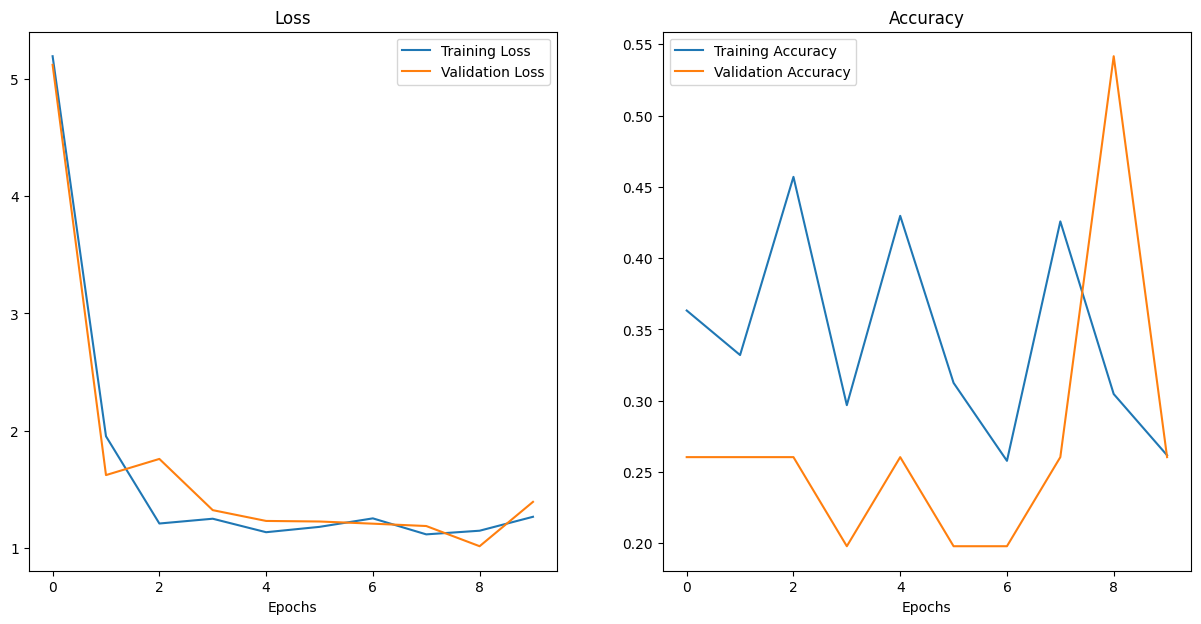

In [34]:
visualization.plot_curves(results)

# 4. Pretrained ViT model

## 4.A Getting pre-trained ViT model



In [35]:
pretrained_vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT

pretrained_vit = torchvision.models.vit_b_16(weights=pretrained_vit_weights).to(device)

for parameter in pretrained_vit.parameters():
    parameter.requires_grad = False

utils.set_seeds()
pretrained_vit.heads = nn.Linear(in_features=768, out_features=len(class_names)).to(device)

Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:07<00:00, 48.3MB/s]


In [36]:
summary(model=pretrained_vit,
        input_size=(32, 3, 224, 224), # (batch_size, color_channels, height, width)
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [32, 3, 224, 224]    [32, 3]              768                  Partial
├─Conv2d (conv_proj)                                         [32, 3, 224, 224]    [32, 768, 14, 14]    (590,592)            False
├─Encoder (encoder)                                          [32, 197, 768]       [32, 197, 768]       151,296              False
│    └─Dropout (dropout)                                     [32, 197, 768]       [32, 197, 768]       --                   --
│    └─Sequential (layers)                                   [32, 197, 768]       [32, 197, 768]       --                   False
│    │    └─EncoderBlock (encoder_layer_0)                   [32, 197, 768]       [32, 197, 768]       (7,087,872)          False
│    │    └─EncoderBlock (encoder_layer_1)                   [32, 197, 768]       [32, 

## 4.B Making dataloaders with Auto Transforms

In [37]:
pretrained_vit_transforms = pretrained_vit_weights.transforms()

BATCH_SIZE = 32

train_dataloader_pretrained, test_dataloader_pretrained, class_names = data_setup.create_cv_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    train_transform=pretrained_vit_transforms,
    test_transform=pretrained_vit_transforms,
    batch_size=BATCH_SIZE
    )

train_dataloader_pretrained, test_dataloader_pretrained, class_names

(<torch.utils.data.dataloader.DataLoader at 0x7d15431fac50>,
 ['pizza', 'steak', 'sushi'])

## 4.C Fine-tuning pre-trained ViT model

In [38]:
next(enumerate(train_dataloader_pretrained))[1][0].shape

torch.Size([32, 3, 224, 224])

In [39]:
optimizer = torch.optim.Adam(params=pretrained_vit.parameters(),
                             lr=1e-3)

loss_fn = torch.nn.CrossEntropyLoss()

utils.set_seeds()

results = engine.train(model=pretrained_vit,
                       train_dataloader=train_dataloader_pretrained,
                       val_dataloader=test_dataloader_pretrained,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=10,
                       device=device)

[INFO] Using device: cuda


  0%|          | 0/10 [00:00<?, ?it/s]

[INFO] Epoch: 1 | Train_loss: 0.7663 | Train_acc: 0.7188 | Val_loss: 0.5435 | Val_acc: 0.8769
[INFO] Epoch: 2 | Train_loss: 0.3436 | Train_acc: 0.9453 | Val_loss: 0.3257 | Val_acc: 0.8977
[INFO] Epoch: 3 | Train_loss: 0.2068 | Train_acc: 0.9492 | Val_loss: 0.2698 | Val_acc: 0.9186
[INFO] Epoch: 4 | Train_loss: 0.1557 | Train_acc: 0.9609 | Val_loss: 0.2414 | Val_acc: 0.9186
[INFO] Epoch: 5 | Train_loss: 0.1244 | Train_acc: 0.9727 | Val_loss: 0.2271 | Val_acc: 0.8977
[INFO] Epoch: 6 | Train_loss: 0.1210 | Train_acc: 0.9766 | Val_loss: 0.2122 | Val_acc: 0.9280
[INFO] Epoch: 7 | Train_loss: 0.0933 | Train_acc: 0.9766 | Val_loss: 0.2342 | Val_acc: 0.8883
[INFO] Epoch: 8 | Train_loss: 0.0793 | Train_acc: 0.9844 | Val_loss: 0.2268 | Val_acc: 0.9081
[INFO] Epoch: 9 | Train_loss: 0.1084 | Train_acc: 0.9883 | Val_loss: 0.2064 | Val_acc: 0.9384
[INFO] Epoch: 10 | Train_loss: 0.0646 | Train_acc: 0.9922 | Val_loss: 0.1795 | Val_acc: 0.9176
[INFO] Training time: 48.088 seconds


## 4.D Plotting loss curves

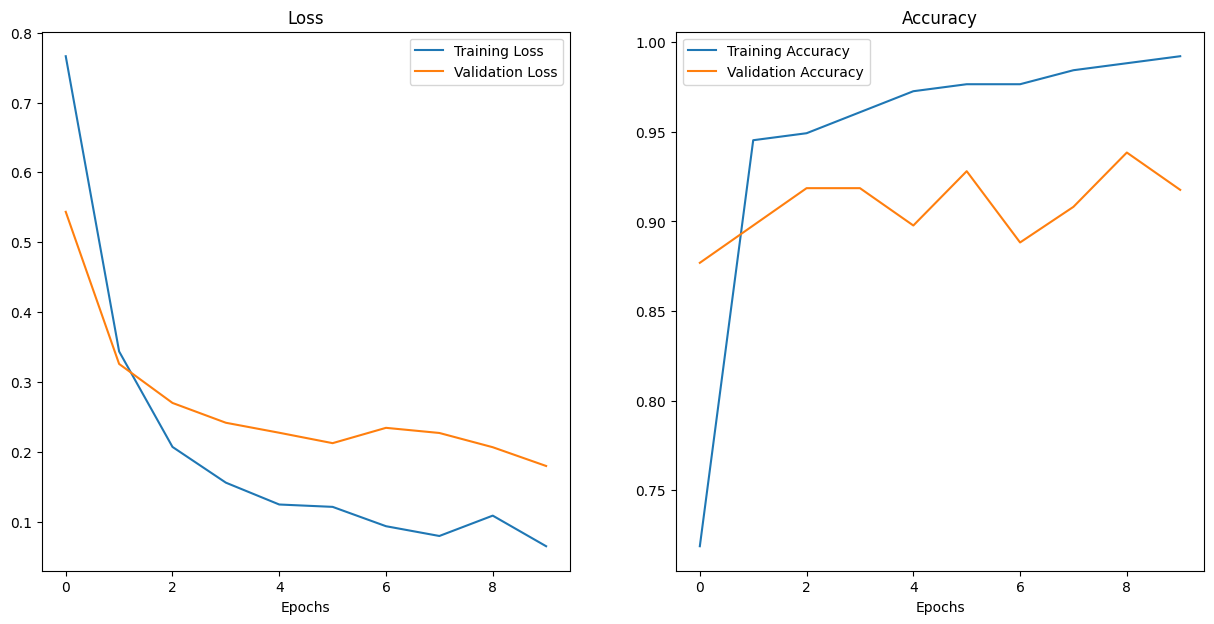

In [40]:
visualization.plot_curves(results)

## 4.E Saving fine-tuned model

In [41]:
model_path = deployment.save_model_to_directory(
    model=pretrained_vit,
    target_directory="models",
    save_name="pretrained_vit_feature_extractor_pizza_steak_sushi.pth"
)

[INFO] Model saved to: models/pretrained_vit_feature_extractor_pizza_steak_sushi.pth


In [42]:
pretrained_vit_model_size = model_path.stat().st_size // (1024*1024)
print(f"Fine-tuned ViT model rough size: {pretrained_vit_model_size} MB")

Fine-tuned ViT model rough size: 327 MB


# 5. Making Predictions

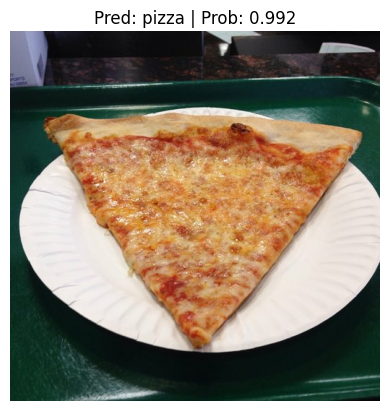

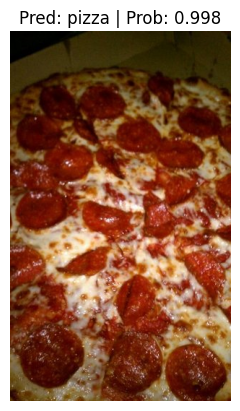

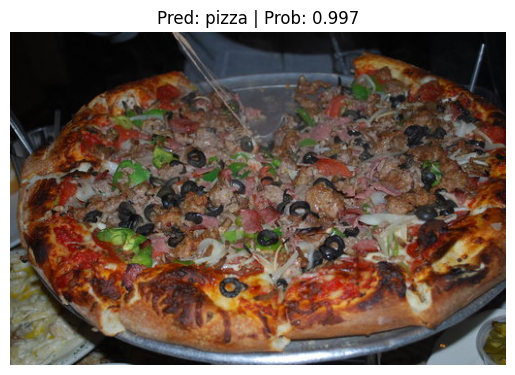

In [43]:
evaluation.pred_and_plot_local_random_images(model=pretrained_vit,
                                              test_dir_path=test_dir,
                                              class_names=class_names,
                                              transform=pretrained_vit_transforms,
                                              device=device)

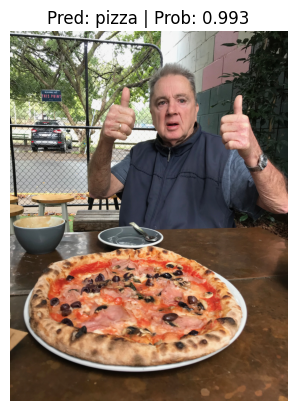

In [44]:
evaluation.pred_on_custom_image_url(model=pretrained_vit,
                                    class_names=class_names,
                                    transform=pretrained_vit_transforms,
                                    url="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg",
                                    device=device)

In [45]:
loss_fn = nn.CrossEntropyLoss()

Making Predictions:   0%|          | 0/3 [00:00<?, ?it/s]

{'model_name': 'VisionTransformer',
 'model_loss': 0.20908866822719574,
 'model_acc': 0.9466666579246521,
 'model_precision': 0.9466666579246521,
 'model_recall': 0.9466666579246521,
 'model_fl_score': 0.9466666579246521,
 'model_confusion_matrix': array([[24,  1,  0],
        [ 0, 16,  3],
        [ 0,  0, 31]])}

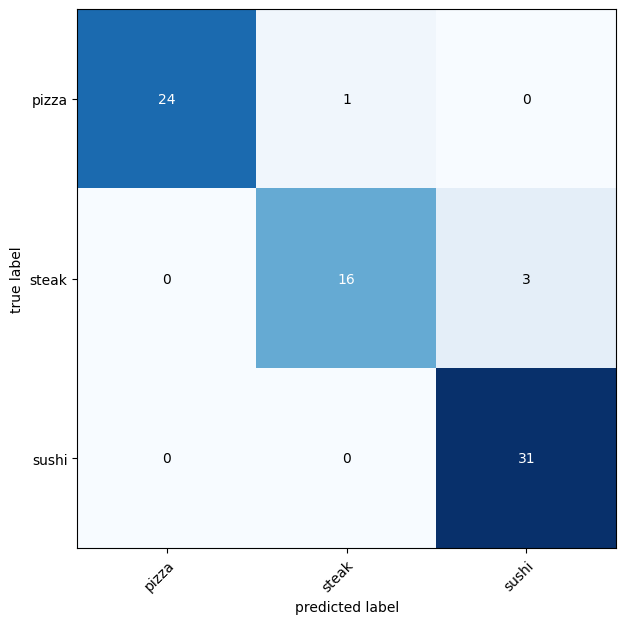

In [46]:
evaluation.evaluate_model_metrics(
    model=pretrained_vit,
    test_dataloader=test_dataloader,
    class_names=class_names,
    task="multiclass",
    loss_fn=loss_fn,
    device=device
)

In [47]:
report = evaluation.evaluate_classification_report(
    model=pretrained_vit,
    test_dataloader=test_dataloader,
    class_names=class_names,
    task="multiclass",
    device=device
)

print(report)

Making Predictions:   0%|          | 0/3 [00:00<?, ?it/s]

              precision    recall  f1-score   support

       pizza       1.00      0.96      0.98        25
       steak       0.94      0.84      0.89        19
       sushi       0.91      1.00      0.95        31

    accuracy                           0.95        75
   macro avg       0.95      0.93      0.94        75
weighted avg       0.95      0.95      0.95        75



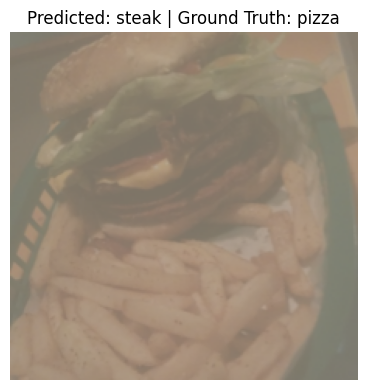

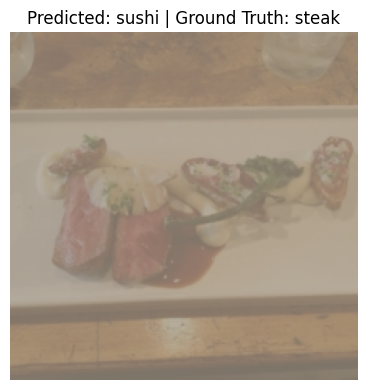

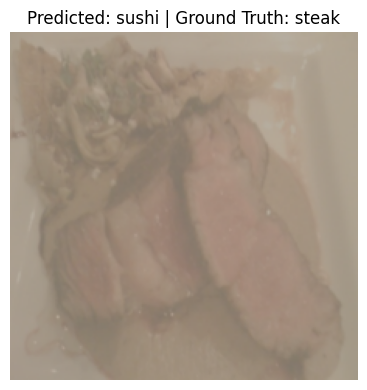

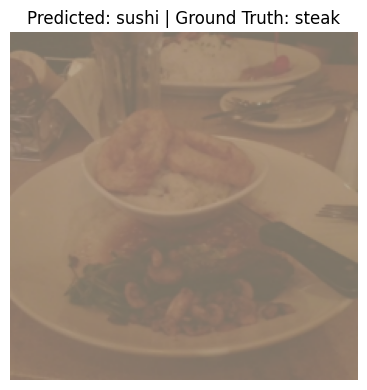

In [48]:
failed_image_gen = evaluation.failed_image_generator(
    pretrained_vit,
    test_dataloader,
    task="multiclass",
    threshold=0.5,
    device=device
)
evaluation.plot_failed_images_from_generator(
    failed_image_gen,
    class_names,
    transform=pretrained_vit_transforms,
    max_images=10
)

In [49]:
print("Happy building models, end of notebook")

Happy building models, end of notebook
